In [1]:
import tensorflow as tf
from keras.datasets import cifar100
from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, Activation, Lambda
from tensorflow.keras.models import Model
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import datetime, os

%load_ext tensorboard

In [2]:
#Load dataset
(X_c_train, y_c_train), (X_c_test, y_c_test) = cifar100.load_data(label_mode='coarse')
(X_f_train, y_f_train), (X_f_test, y_f_test) = cifar100.load_data(label_mode='fine')

X_train = X_f_train
X_val = X_f_test[:5000]
X_test = X_f_test[5000:]

y_train = [y_c_train, y_f_train]
y_val = [y_c_test[:5000], y_f_test[:5000]]
y_test = [y_c_test[5000:], y_f_test[5000:]]

image_size = X_train[0].shape

num_classes_c = len(set([v[0] for v in y_c_train]))
num_classes_f = len(set([v[0] for v in y_f_train]))



Model: "Model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_12 (Flatten)            (None, 512)          0           vgg19[0][0]                      
__________________________________________________________________________________________________
out_c (Dense)                   (None, 20)           10260       flatten_12[0][0]                 
____________________________________________________________________________________________

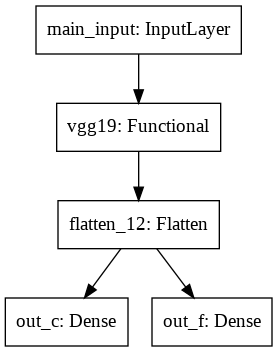

In [18]:
def get_model1(pi=0.5):
    # Conv base
    in_layer = Input(shape=image_size, name='main_input')
    conv_base = keras.applications.VGG19(
        include_top=False,
        weights="imagenet")(in_layer)
    conv_base = Flatten()(conv_base)
    # coarse output
    out_c = Dense(num_classes_c, activation="softmax", name='out_c')(conv_base)
    # fine output 
    out_f = Dense(num_classes_f, activation="softmax", name='out_f')(conv_base)
    # Build the model
    model = Model(name='Model_1',
            inputs=in_layer,
            outputs=[out_c, out_f])
    loss = keras.losses.SparseCategoricalCrossentropy()
    optimizer = keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(optimizer=optimizer, 
                  loss=[loss, loss],
                  loss_weights=[1-pi, pi],
                  metrics=['accuracy'])
    return model

model = get_model1()
model.summary()
plot_model(model)

Model: "Model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, None, None, 512)   20024384  
_________________________________________________________________
flatten_13 (Flatten)         (None, 512)               0         
_________________________________________________________________
out_c (Dense)                (None, 20)                10260     
_________________________________________________________________
out_f (Dense)                (None, 100)               2100      
Total params: 20,036,744
Trainable params: 20,036,744
Non-trainable params: 0
_________________________________________________________________


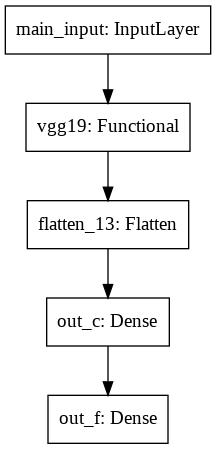

In [19]:
def get_model2(pi=0.5):
    # Conv base
    in_layer = Input(shape=image_size, name='main_input')
    conv_base = keras.applications.VGG19(
        include_top=False,
        weights="imagenet")(in_layer)
    conv_base = Flatten()(conv_base)
    # coarse output
    out_c = Dense(num_classes_c, activation="softmax", name='out_c')(conv_base)
    # fine output 
    out_f = Dense(num_classes_f, activation="softmax", name='out_f')(out_c)
    # Build the model
    model = Model(name='Model_2',
            inputs=in_layer,
            outputs=[out_c, out_f])
    loss = keras.losses.SparseCategoricalCrossentropy()
    optimizer = keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(optimizer=optimizer, 
                  loss=[loss, loss],
                  loss_weights=[1-pi, pi],
                  metrics=['accuracy'])
    return model

model = get_model2()
model.summary()
plot_model(model)

Model: "Model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_14 (Flatten)            (None, 512)          0           vgg19[0][0]                      
__________________________________________________________________________________________________
logits_c (Dense)                (None, 20)           10260       flatten_14[0][0]                 
____________________________________________________________________________________________

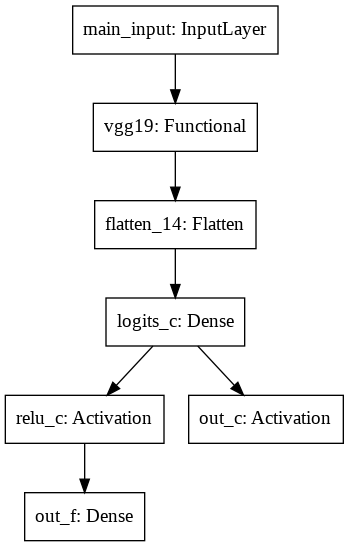

In [20]:
def get_model3(pi=0.5):
    # Conv base
    in_layer = Input(shape=image_size, name='main_input')
    conv_base = keras.applications.VGG19(
        include_top=False,
        weights="imagenet")(in_layer)
    conv_base = Flatten()(conv_base)
    # coarse output
    logits_c = Dense(num_classes_c, name='logits_c')(conv_base)
    out_c = Activation(keras.activations.softmax, name='out_c')(logits_c)
    
    # fine output 
    relu_c = Activation(keras.activations.relu, name='relu_c')(logits_c)
    out_f = Dense(num_classes_f, activation="softmax", name='out_f')(relu_c)
    # Build the model
    model = Model(name='Model_3',
            inputs=in_layer,
            outputs=[out_c, out_f])
    loss = keras.losses.SparseCategoricalCrossentropy()
    optimizer = keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(optimizer=optimizer, 
                  loss=[loss, loss],
                  loss_weights=[1-pi, pi],
                  metrics=['accuracy'])
    return model

model = get_model3()
model.summary()
plot_model(model)


Model: "Model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_20 (Flatten)            (None, 512)          0           vgg19[0][0]                      
__________________________________________________________________________________________________
logits_f (Dense)                (None, 100)          51300       flatten_20[0][0]                 
____________________________________________________________________________________________

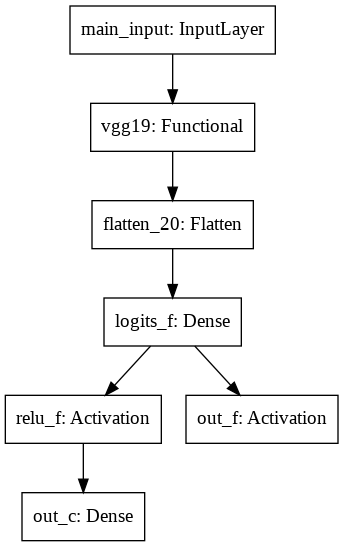

In [26]:
def get_model4(pi=0.5):
    # Conv base
    in_layer = Input(shape=image_size, name='main_input')
    conv_base = keras.applications.VGG19(
        include_top=False,
        weights="imagenet")(in_layer)
    conv_base = Flatten()(conv_base)
    # coarse output
    logits_f = Dense(num_classes_f, name='logits_f')(conv_base)
    relu_f = Activation(keras.activations.relu, name='relu_f')(logits_f)
    out_c = Dense(num_classes_c, activation="softmax", name='out_c')(relu_f)
    # fine output 
    out_f = Activation(keras.activations.softmax, name='out_f')(logits_f)
    # Build the model
    model = Model(name='Model_4',
            inputs=in_layer,
            outputs=[out_c, out_f])
    loss = keras.losses.SparseCategoricalCrossentropy()
    optimizer = keras.optimizers.Adam(learning_rate=1e-5)
    model.compile(optimizer=optimizer, 
                  loss=[loss, loss],
                  loss_weights=[1-pi, pi],
                  metrics=['accuracy'])
    return model

model = get_model4()
model.summary()
plot_model(model)


In [24]:
# Create the model
model = get_model1(1)
model.summary()
plot_model(model)
#train model
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
batch = 128
history = model.fit(X_train, 
                    y_train,
                    validation_data = (X_val, y_val), 
                    batch_size=batch, 
                    epochs=20,
                    callbacks=[tensorboard_callback])

# model.evaluate(X_test, y_test)


Model: "Model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_18 (Flatten)            (None, 512)          0           vgg19[0][0]                      
__________________________________________________________________________________________________
out_c (Dense)                   (None, 20)           10260       flatten_18[0][0]                 
____________________________________________________________________________________________

In [31]:
# Create the model
model = get_model1(0)
model.summary()
plot_model(model)
#train model
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
batch = 128
history = model.fit(X_train, 
                    y_train,
                    validation_data = (X_val, y_val), 
                    batch_size=batch, 
                    epochs=20,
                    callbacks=[tensorboard_callback])



Model: "Model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_25 (Flatten)            (None, 512)          0           vgg19[0][0]                      
__________________________________________________________________________________________________
out_c (Dense)                   (None, 20)           10260       flatten_25[0][0]                 
____________________________________________________________________________________________

In [32]:
# Create the model
model = get_model1(0.5)
model.summary()
plot_model(model)
#train model
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
batch = 128
history = model.fit(X_train, 
                    y_train,
                    validation_data = (X_val, y_val), 
                    batch_size=batch, 
                    epochs=20,
                    callbacks=[tensorboard_callback])



Model: "Model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_26 (Flatten)            (None, 512)          0           vgg19[0][0]                      
__________________________________________________________________________________________________
out_c (Dense)                   (None, 20)           10260       flatten_26[0][0]                 
____________________________________________________________________________________________

In [33]:
# Create the model
model = get_model2(0.5)
model.summary()
plot_model(model)
#train model
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
batch = 128
history = model.fit(X_train, 
                    y_train,
                    validation_data = (X_val, y_val), 
                    batch_size=batch, 
                    epochs=20,
                    callbacks=[tensorboard_callback])



Model: "Model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, None, None, 512)   20024384  
_________________________________________________________________
flatten_27 (Flatten)         (None, 512)               0         
_________________________________________________________________
out_c (Dense)                (None, 20)                10260     
_________________________________________________________________
out_f (Dense)                (None, 100)               2100      
Total params: 20,036,744
Trainable params: 20,036,744
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
391/391 [==============================] - 18s 43ms/step - loss: 3.8899 - out_c_loss: 3.1713 - out_f_l

In [34]:
# Create the model
model = get_model3(0.5)
model.summary()
plot_model(model)
#train model
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
batch = 128
history = model.fit(X_train, 
                    y_train,
                    validation_data = (X_val, y_val), 
                    batch_size=batch, 
                    epochs=20,
                    callbacks=[tensorboard_callback])



Model: "Model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_28 (Flatten)            (None, 512)          0           vgg19[0][0]                      
__________________________________________________________________________________________________
logits_c (Dense)                (None, 20)           10260       flatten_28[0][0]                 
____________________________________________________________________________________________

In [37]:
# Create the model
model = get_model4(0.5)
model.summary()
plot_model(model)
#train model
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
batch = 128
history = model.fit(X_train, 
                    y_train,
                    validation_data = (X_val, y_val), 
                    batch_size=batch, 
                    epochs=20,
                    callbacks=[tensorboard_callback])



Model: "Model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_29 (Flatten)            (None, 512)          0           vgg19[0][0]                      
__________________________________________________________________________________________________
logits_f (Dense)                (None, 100)          51300       flatten_29[0][0]                 
____________________________________________________________________________________________

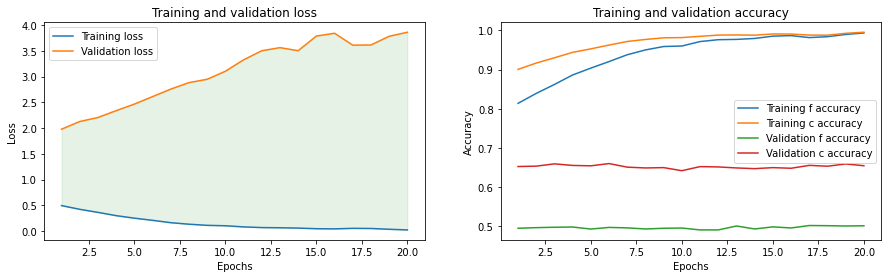

In [38]:
out_f_accuracy = history.history['out_f_accuracy']
out_c_accuracy = history.history['out_c_accuracy']
val_out_f_accuracy = history.history['val_out_f_accuracy']
val_out_c_accuracy = history.history['val_out_c_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, out_f_accuracy, label='Training f accuracy')
plt.plot(epochs, out_c_accuracy, label='Training c accuracy')
plt.plot(epochs, val_out_f_accuracy, label='Validation f accuracy')
plt.plot(epochs, val_out_c_accuracy, label='Validation c accuracy')
# plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()